In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
multiple = pd.read_csv('results_seagull.csv', index_col=0)
multiple

,model,trainc1,trainc2,testc1,testc2
0,fcn8s,0.965481,0.022900,0.964118,0.031482
1,unet,0.998477,0.652954,0.997730,0.648498
2,fpn,0.998544,0.686905,0.997822,0.677789


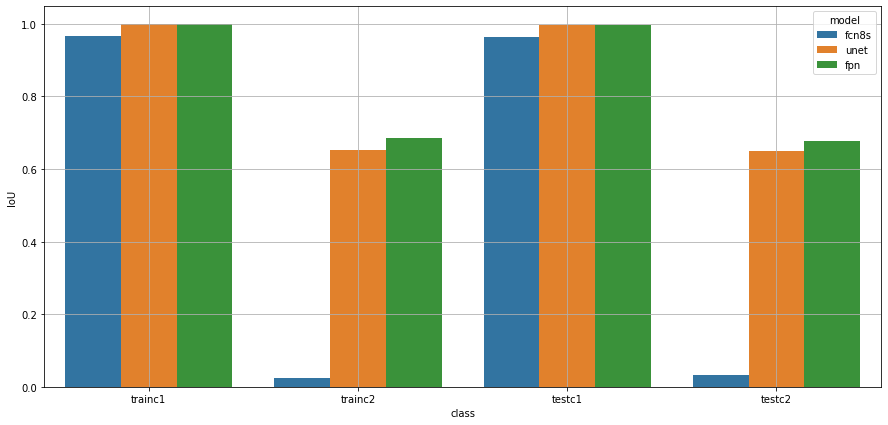

In [3]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=multiple.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [4]:
multiple.iloc[:,2:4]

,trainc2,testc1
0,0.022900,0.964118
1,0.652954,0.997730
2,0.686905,0.997822


In [5]:
multiple.iloc[:,4:]

,testc2
0,0.031482
1,0.648498
2,0.677789


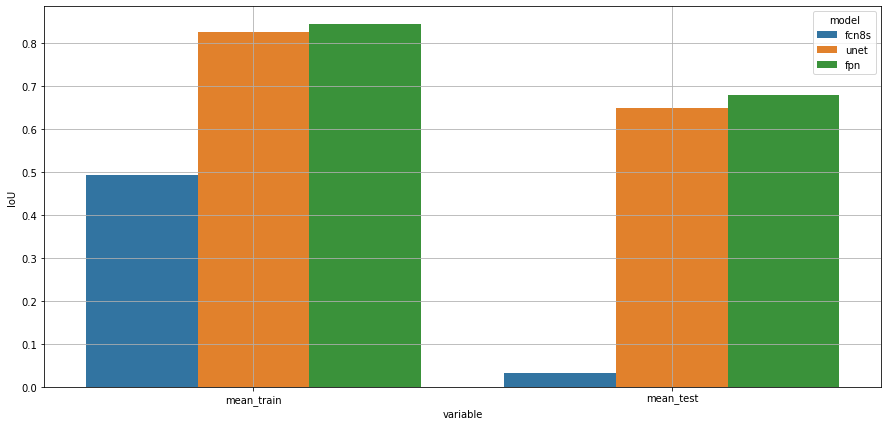

In [6]:
mean_results = multiple.copy()
mean_results['mean_train'] = multiple.iloc[:,2:4].mean(axis=1)
mean_results['mean_test'] = multiple.iloc[:,4:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [7]:
mean_results

,mean_train,mean_test,model
0,0.493509,0.031482,fcn8s
1,0.825342,0.648498,unet
2,0.842364,0.677789,fpn
